# Convolutional Neural Network Architecture
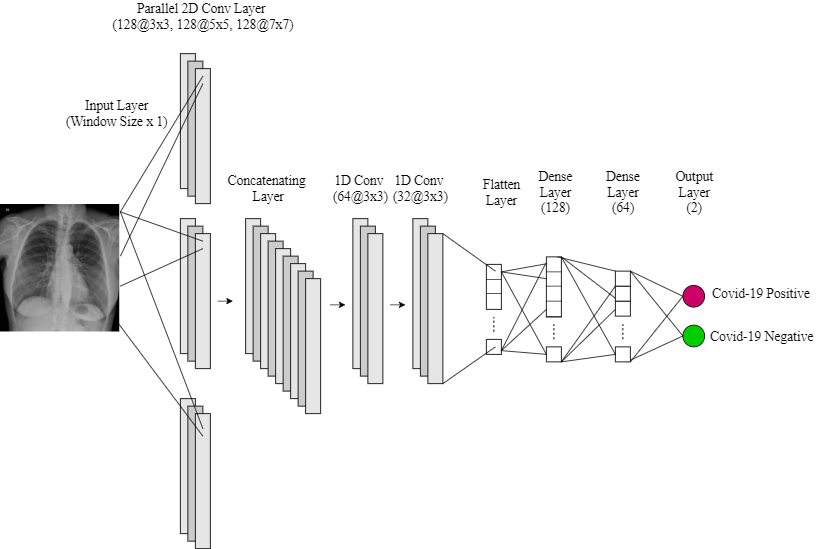

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [5]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k], padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inp, out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 100, 100, 384)     11008     
                                                                 
 conv2d_6 (Conv2D)           (None, 98, 98, 64)        221248    
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                        

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.5824 - accuracy: 0.7677

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


18/18 [==============================] - 135s 7s/step - loss: 0.5824 - accuracy: 0.7677 - val_loss: 0.5312 - val_accuracy: 0.7903
Epoch 2/20
18/18 [==============================] - ETA: 0s - loss: 0.4864 - accuracy: 0.8040

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


18/18 [==============================] - 136s 7s/step - loss: 0.4864 - accuracy: 0.8040 - val_loss: 0.4040 - val_accuracy: 0.8871
Epoch 3/20
18/18 [==============================] - 123s 7s/step - loss: 0.4671 - accuracy: 0.8621 - val_loss: 0.4205 - val_accuracy: 0.8871
Epoch 4/20
18/18 [==============================] - ETA: 0s - loss: 0.4588 - accuracy: 0.8367

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


18/18 [==============================] - 117s 6s/step - loss: 0.4588 - accuracy: 0.8367 - val_loss: 0.3755 - val_accuracy: 0.8871
Epoch 5/20
18/18 [==============================] - 119s 7s/step - loss: 0.4023 - accuracy: 0.8711 - val_loss: 0.3758 - val_accuracy: 0.8871
Epoch 6/20
18/18 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.8639

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


18/18 [==============================] - 116s 6s/step - loss: 0.4160 - accuracy: 0.8639 - val_loss: 0.3359 - val_accuracy: 0.9032
Epoch 7/20
18/18 [==============================] - ETA: 0s - loss: 0.3686 - accuracy: 0.8802

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


18/18 [==============================] - 119s 6s/step - loss: 0.3686 - accuracy: 0.8802 - val_loss: 0.3324 - val_accuracy: 0.8871
Epoch 8/20
18/18 [==============================] - 119s 6s/step - loss: 0.3532 - accuracy: 0.8820 - val_loss: 0.3331 - val_accuracy: 0.9032
Epoch 9/20
18/18 [==============================] - 112s 6s/step - loss: 0.3760 - accuracy: 0.8730 - val_loss: 0.3417 - val_accuracy: 0.9032
Epoch 10/20
18/18 [==============================] - ETA: 0s - loss: 0.3277 - accuracy: 0.8984

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


18/18 [==============================] - 114s 6s/step - loss: 0.3277 - accuracy: 0.8984 - val_loss: 0.3313 - val_accuracy: 0.8871
Epoch 11/20
18/18 [==============================] - 116s 6s/step - loss: 0.3074 - accuracy: 0.8929 - val_loss: 0.3509 - val_accuracy: 0.8871
Epoch 12/20
18/18 [==============================] - 111s 6s/step - loss: 0.3518 - accuracy: 0.8820 - val_loss: 0.3749 - val_accuracy: 0.9032
Epoch 13/20
18/18 [==============================] - 106s 6s/step - loss: 0.2997 - accuracy: 0.8966 - val_loss: 0.3567 - val_accuracy: 0.8871
Epoch 14/20
18/18 [==============================] - ETA: 0s - loss: 0.2803 - accuracy: 0.9020

INFO:tensorflow:Assets written to: model-014.model\assets


INFO:tensorflow:Assets written to: model-014.model\assets


18/18 [==============================] - 104s 6s/step - loss: 0.2803 - accuracy: 0.9020 - val_loss: 0.3274 - val_accuracy: 0.8710
Epoch 15/20
18/18 [==============================] - 104s 6s/step - loss: 0.3389 - accuracy: 0.8875 - val_loss: 0.3274 - val_accuracy: 0.9032
Epoch 16/20
18/18 [==============================] - 1418s 83s/step - loss: 0.2771 - accuracy: 0.9056 - val_loss: 0.3816 - val_accuracy: 0.8387
Epoch 17/20
18/18 [==============================] - ETA: 0s - loss: 0.2697 - accuracy: 0.9056

INFO:tensorflow:Assets written to: model-017.model\assets


INFO:tensorflow:Assets written to: model-017.model\assets


18/18 [==============================] - 113s 6s/step - loss: 0.2697 - accuracy: 0.9056 - val_loss: 0.3239 - val_accuracy: 0.8871
Epoch 18/20
18/18 [==============================] - 112s 6s/step - loss: 0.2612 - accuracy: 0.9111 - val_loss: 0.3973 - val_accuracy: 0.8548
Epoch 19/20
18/18 [==============================] - 110s 6s/step - loss: 0.2693 - accuracy: 0.9129 - val_loss: 0.4567 - val_accuracy: 0.8387
Epoch 20/20
18/18 [==============================] - 113s 6s/step - loss: 0.2821 - accuracy: 0.9020 - val_loss: 0.4634 - val_accuracy: 0.8065


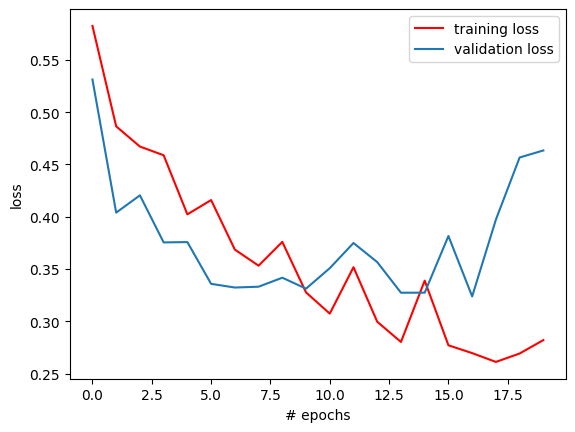

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

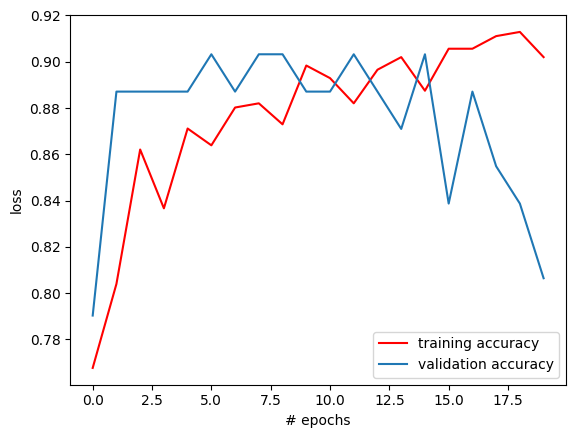

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

3/3 [==============================] - 3s 829ms/step - loss: 0.2060 - accuracy: 0.9275
[0.2060149610042572, 0.9275362491607666]
